In [3]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('datasets/1990.12.19-今股票上证指数数据.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [5]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
# 计算000001上证指数日收益率 两种：
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [6]:
Month_data = daily_data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data.reset_index(inplace=True)
Month_data.rename(columns={'Day':'month'},inplace=True)
Month_data.set_index('month',inplace=True)
Month_data

,Log_return,Raw_return
month,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [7]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return']) - 1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [8]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] = np.exp(Year_data['Log_return']) - 1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [9]:
inflation = pd.read_csv('datasets/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1
1987-02-28,5.4
1987-03-31,5.8
1987-04-30,6.7
1987-05-31,7.6
...,...
2023-03-31,0.7
2023-04-30,0.1
2023-05-31,0.2


In [10]:
market_variance = daily_data.resample('M').apply({
    'Raw_return':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','Raw_return':'MV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month']

,MV
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2022-03-31,0.006740
2022-04-30,0.006234
2022-05-31,0.002035


换手率

In [11]:
cross = pd.read_csv('datasets/cross_section.csv')
from pandas.tseries.offsets import MonthEnd
cross['month'] = pd.to_datetime(cross['month'], format='%b %Y') + MonthEnd(1)
cross['to_v'] = pd.to_numeric(cross['to_v'])
cross['floatingvalue'] = pd.to_numeric(cross['floatingvalue'])
# # drop column 1
cross.drop(columns=['Unnamed: 0'], inplace=True)
cross = cross.dropna(subset=['to_v','floatingvalue'])
# cross = cross.dropna()
cross

,Stkcd,month,Rank,Freq,floatingvalue,totalvalue,sizef,sizet,Return,rfmonth,ret,next_ret,next_ret2,next_ret3,next_ret4,next_ret5,next_ret6,next_ret7,next_ret8,next_ret9,next_ret10,next_ret11,next_ret12,beta_6m,N6m,beta_12m,N12m,beta_1y,N1y,beta_5y,N5y,to_v,to_m
0,1,1991-04-30,1,20.0,1.157520e+09,2.118487e+09,20.869546,21.473968,NaN,0.006651,NaN,-0.128345,-0.119551,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000506,0.000506
1,1,1991-05-31,2,24.0,1.016010e+09,1.859497e+09,20.739149,21.343572,-0.122253,0.006092,-0.128345,-0.119551,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,4.192309,44.0,4.192309,44.0,NaN,1.0,NaN,1.0,0.007087,0.007085
2,1,1991-06-30,3,23.0,9.007350e+08,1.648521e+09,20.618722,21.223144,-0.113459,0.006092,-0.119551,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.246808,67.0,0.246808,67.0,-1.821836,2.0,-1.821836,2.0,0.001155,0.001154
3,1,1991-07-31,4,16.0,7.828100e+08,1.432695e+09,20.478401,21.082823,-0.130921,0.006092,-0.137013,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,0.165424,83.0,0.165424,83.0,0.807037,3.0,0.807037,3.0,0.000230,0.000231
4,1,1991-08-31,5,15.0,6.748338e+08,1.346275e+09,20.329977,21.020607,-0.411588,0.006092,-0.417680,-0.039425,0.849080,0.016213,0.061181,0.055237,0.006749,0.239957,0.471835,0.167934,-0.076888,0.079622,-0.101487,1.506699,98.0,1.506699,98.0,23.378197,4.0,23.378197,4.0,0.072087,0.071757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695742,605599,2022-08-31,12,23.0,7.933336e+08,7.933334e+09,20.491754,22.794339,-0.059908,0.001241,-0.061149,-0.090457,-0.028152,0.049644,0.070338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895807,126.0,0.769963,235.0,1.241669,11.0,1.241669,11.0,0.565746,0.565471
695743,605599,2022-09-30,13,21.0,5.450237e+09,7.225556e+09,22.418925,22.700890,-0.089216,0.001241,-0.090457,-0.028152,0.049644,0.070338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.863212,124.0,0.728424,243.0,1.248894,12.0,1.248894,12.0,0.120495,0.120449
695744,605599,2022-10-31,14,16.0,5.303567e+09,7.031111e+09,22.391646,22.673611,-0.026911,0.001241,-0.028152,0.049644,0.070338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.535141,121.0,0.689392,243.0,1.254507,12.0,1.225688,13.0,0.046909,0.046907
695745,605599,2022-11-30,15,22.0,5.573439e+09,7.388889e+09,22.441278,22.723243,0.050885,0.001241,0.049644,0.070338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467310,124.0,0.685020,243.0,1.083832,12.0,1.103585,14.0,0.068665,0.068614


In [12]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) 
))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1990-12-31,0.001785
1991-01-31,0.019217
1991-02-28,0.038486
1991-03-31,0.014105
1991-04-30,0.014399
...,...
2022-08-31,0.312049
2022-09-30,0.216061
2022-10-31,0.194497


In [13]:
turnover = pd.DataFrame(cross.groupby(['month']).apply(
    lambda x:
    np.average(x['to_v'],weights=x['floatingvalue']) 
))
turnover = turnover.rename(columns={0:'to'})
turnover

,to
month,
1990-12-31,0.001785
1991-01-31,0.019217
1991-02-28,0.038486
1991-03-31,0.014105
1991-04-30,0.014399
...,...
2022-08-31,0.312049
2022-09-30,0.216061
2022-10-31,0.194497


月度数据的预测

价格指标
模型 价量模型

In [14]:
price = pd.read_csv('datasets/priceratio.csv')
price['month'] = pd.date_range(start='2000',end='2022',freq='M')
price.set_index('month',inplace=True)
price

,pd,pb,pe
month,,,
2000-01-31,5.311050,1.445262,3.695553
2000-02-29,5.429869,1.553916,3.788974
2000-03-31,5.493947,1.590367,3.820005
2000-04-30,5.474707,1.605969,3.888418
2000-05-31,5.453072,1.633036,3.915735
...,...,...,...
2021-08-31,4.082353,0.515687,2.761659
2021-09-30,4.078039,0.520634,2.767360
2021-10-31,4.068158,0.497318,2.750286


In [15]:
reg_data = pd.merge(Month_data,market_variance,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data = pd.merge(reg_data,price,on='month')
reg_data = pd.merge(reg_data,turnover,on='month')
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to
month,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.481117
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605590
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.773570
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.482107
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.355027
...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.421353
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.366907
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226861


描述性统计 Summary

In [16]:
reg_data['pe'].describe().round(5)

count    264.00000
mean       3.00720
std        0.45969
min        2.33970
25%        2.65748
50%        2.86223
75%        3.32031
max        3.99491
Name: pe, dtype: float64

In [17]:
reg_data['pd'].skew()
reg_data['pd'].kurt()

0.8538520559922796

-0.31178130194673015

作图

CPU times: total: 453 ms
Wall time: 446 ms


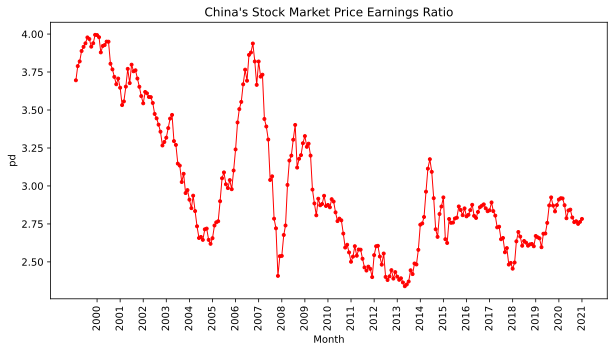

In [18]:
%%time
fig = plt.figure(figsize=(10, 5)) # 图片比例
plt.plot(
    'pe',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])  # 画图的数据
plt.title("China's Stock Market Price Earnings Ratio") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('pd') # 画图的y轴名称

year_freq = pd.date_range(start='2000', end='2022', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)

fig.savefig('pe.pdf', bbox_inches='tight')

CPU times: total: 188 ms
Wall time: 165 ms


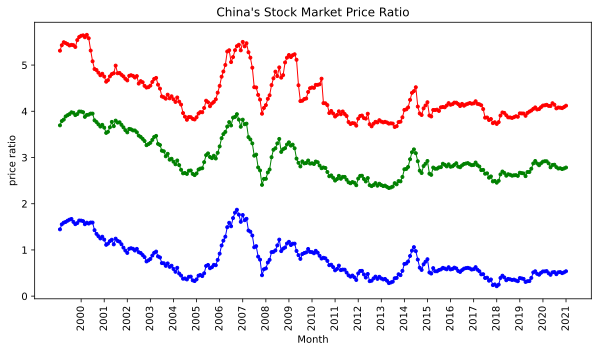

In [19]:
%%time
fig = plt.figure(figsize=(10, 5)) # 图片比例
plt.plot(
    'pd',  # 要画图的变量名
    '.-r',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])  # 画图的数据
plt.plot(
    'pe',  # 要画图的变量名
    '.-g',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])
plt.plot(
    'pb',  # 要画图的变量名
    '.-b',  # 线的类型
    linewidth = 1,  # 线的粗细
    data = reg_data['2000-01-01':'2021-12-31'])
plt.title("China's Stock Market Price Ratio") # 画图的标题
plt.xlabel('Month') # 画图的x轴名称
plt.ylabel('price ratio') # 画图的y轴名称

year_freq = pd.date_range(start='2000', end='2022', freq='y')
c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)

fig.savefig('pd.pdf', bbox_inches='tight')

CPU times: total: 234 ms
Wall time: 230 ms


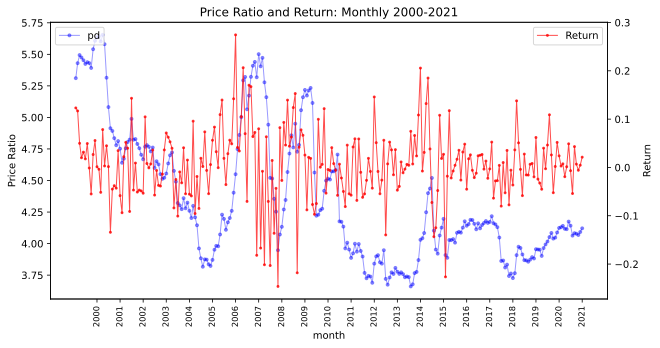

In [20]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Return: Monthly 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['Raw_return'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='Return')
ax2.set_ylabel('Return')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='2000', end='2022', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('price return.pdf', bbox_inches='tight')

In [21]:
reg_data['lpe'] = reg_data['pe'].shift(1)
model_fore_pd = smf.ols('Raw_return ~ lpe',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_pd.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5812
Date:                Thu, 23 Nov 2023   Prob (F-statistic):              0.447
Time:                        15:31:04   Log-Likelihood:                 317.57
No. Observations:                 263   AIC:                            -631.1
Df Residuals:                     261   BIC:                            -624.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0320      0.033      0.983      0.3

In [22]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     4.136
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0430
Time:                        15:31:04   Log-Likelihood:                 320.65
No. Observations:                 263   AIC:                            -637.3
Df Residuals:                     261   BIC:                            -630.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0145      0.009     -1.642      0.1

In [23]:
reg_data['lto'] = reg_data['to'].shift(1)
model_fore_two = smf.ols('Raw_return ~ lto + lpe',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_two.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.268
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0396
Time:                        15:31:04   Log-Likelihood:                 322.03
No. Observations:                 263   AIC:                            -638.1
Df Residuals:                     260   BIC:                            -627.3
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0315      0.027      1.159      0.2

In [24]:
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to,lpe,lto
month,,,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.481117,NaN,NaN
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605590,3.695553,0.481117
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.773570,3.788974,0.605590
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.482107,3.820005,0.773570
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.355027,3.888418,0.482107
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.421353,2.792268,0.389225
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.366907,2.761659,0.421353
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226861,2.767360,0.366907


In [25]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_fore_two = smf.ols('Raw_return ~ lto + lpe + lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_fore_two.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     6.427
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           0.000326
Time:                        15:31:04   Log-Likelihood:                 329.03
No. Observations:                 262   AIC:                            -650.1
Df Residuals:                     258   BIC:                            -635.8
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0792      0.033      2.417      0.0

In [26]:
reg_data['fitted_ret'] = model_fore_two.fittedvalues
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to,lpe,lto,lcpi,fitted_ret
month,,,,,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.481117,NaN,NaN,NaN,NaN
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605590,3.695553,0.481117,NaN,NaN
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.773570,3.788974,0.605590,-0.2,0.030039
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.482107,3.820005,0.773570,0.7,0.034753
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.355027,3.888418,0.482107,-0.2,0.017572
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.421353,2.792268,0.389225,1.1,0.027483
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.366907,2.761659,0.421353,1.0,0.031727
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226861,2.767360,0.366907,0.8,0.028983


CPU times: total: 906 ms
Wall time: 220 ms


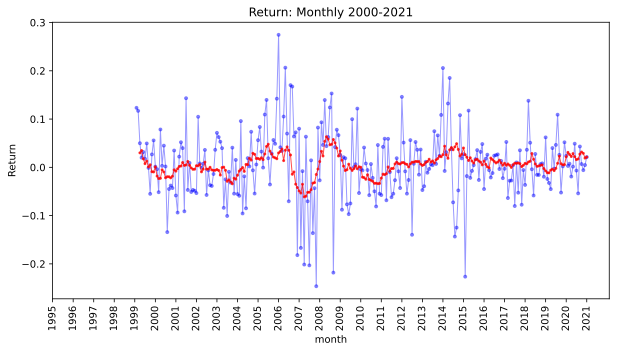

In [27]:
%%time
fig = plt.figure(figsize=(10, 5))

plt.plot(reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
plt.xlabel('month')  # 设置横坐标标签
plt.ylabel('Return')  # 设置左边纵坐标标签
#plt.legend(loc=2)  # 设置图例在左上方
plt.title("Return: Monthly 2000-2021")  # 给整张图命名

# ax2 = ax1.twinx()  #twinx()函数表示共享x轴
plt.plot(reg_data['fitted_ret'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='fitted_ret')
# ax2.set_ylabel('fitted_mv')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2022', freq='y')

c = plt.xticks(year_freq, year_freq.year, rotation=90, fontsize=10)

fig = plt.gcf()
fig.savefig('fitted_ret.pdf', bbox_inches='tight')

In [28]:
reg_data

,Log_return,Raw_return,MV,cpi,pd,pb,pe,to,lpe,lto,lcpi,fitted_ret
month,,,,,,,,,,,,
2000-01-31,0.116219,0.123242,0.008258,-0.2,5.311050,1.445262,3.695553,0.481117,NaN,NaN,NaN,NaN
2000-02-29,0.110638,0.116990,0.013547,0.7,5.429869,1.553916,3.788974,0.605590,3.695553,0.481117,NaN,NaN
2000-03-31,0.048741,0.049948,0.007877,-0.2,5.493947,1.590367,3.820005,0.773570,3.788974,0.605590,-0.2,0.030039
2000-04-30,0.019855,0.020053,0.002494,-0.3,5.474707,1.605969,3.888418,0.482107,3.820005,0.773570,0.7,0.034753
2000-05-31,0.031218,0.031710,0.003515,0.1,5.453072,1.633036,3.915735,0.355027,3.888418,0.482107,-0.2,0.017572
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,0.042240,0.043145,0.001956,0.8,4.082353,0.515687,2.761659,0.421353,2.792268,0.389225,1.1,0.027483
2021-09-30,0.006814,0.006837,0.001526,0.7,4.078039,0.520634,2.767360,0.366907,2.761659,0.421353,1.0,0.031727
2021-10-31,-0.005855,-0.005838,0.000690,1.5,4.068158,0.497318,2.750286,0.226861,2.767360,0.366907,0.8,0.028983


In [30]:
from statsmodels.iolib.summary2 import summary_col
reg_data['lcpi'] = reg_data['cpi'].shift(2)
info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pd = smf.ols('Raw_return ~ lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pdto = smf.ols('Raw_return ~ lto + lpd',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=reg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to,model_pd, model_cpi, model_cpito,model_pdto,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lpd','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Monthly Stock Market Return')

print(results_table)

PatsyError: Error evaluating factor: NameError: name 'lpd' is not defined
    Raw_return ~ lpd
                 ^^^

季度结果

In [31]:
Qreg_data = reg_data.resample('Q').apply({
    'Raw_return':
    lambda x: np.exp(sum(np.log( 1 + x))) - 1,
    'to':
    lambda x: sum(x),
    'pd':
    lambda x: np.mean(x),
    'cpi':
    lambda x: sum(x),
})
Qreg_data

,Raw_return,to,pd,cpi
month,,,,
2000-03-31,0.317318,1.860277,5.411622,0.3
2000-06-30,0.071041,1.310464,5.450551,0.3
2000-09-30,-0.009310,1.021229,5.419918,0.8
2000-12-31,0.085501,0.743491,5.593930,2.8
2001-03-31,0.018954,0.544915,5.633003,2.0
...,...,...,...,...
2020-12-31,0.079247,0.768780,4.086465,0.2
2021-03-31,-0.008972,0.819679,4.128985,-0.1
2021-06-30,0.043374,0.779270,4.143594,3.3


In [32]:
Qreg_data['lto'] = Qreg_data['to'].shift(1)
Qreg_data['lcpi'] = Qreg_data['cpi'].shift(1)
Qreg_data['lpd'] = Qreg_data['pd'].shift(1)
model_to = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
print(model_to.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.843
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.75e-05
Time:                        15:49:46   Log-Likelihood:                 57.205
No. Observations:                  87   AIC:                            -106.4
Df Residuals:                      83   BIC:                            -96.55
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3920      0.116      3.371      0.0

In [33]:
from statsmodels.iolib.summary2 import summary_col

info_dict = {'No. observations': lambda x: f"{int(x.nobs):d}"}

model_to = smf.ols('Raw_return ~ lto',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pd = smf.ols('Raw_return ~ lpd',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpi = smf.ols('Raw_return ~ lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_cpito = smf.ols('Raw_return ~ lto + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_pdto = smf.ols('Raw_return ~ lto + lpd',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})
model_all = smf.ols('Raw_return ~ lto + lpd + lcpi',
                 data=Qreg_data['2000-01':'2021-12']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 2})

results_table = summary_col(results=[model_to,model_pd, model_cpi, model_cpito,model_pdto,model_all],
                            float_format='%0.3f', #数据显示的格式，默认四位小数
                            stars=True, # 是否有*，True为有
                            model_names=['1', '2', '3','4','5','6'],
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'lto','lpd','lcpi'])

results_table.add_title(
    'Table - OLS Regressions: Forecast Quarterly Stock Market Return')

print(results_table)

   Table - OLS Regressions: Forecast Quarterly Stock Market Return
                    1       2        3        4        5         6    
----------------------------------------------------------------------
Intercept        -0.060* 0.291*  0.065***  -0.013   0.327**  0.392*** 
                 (0.032) (0.154) (0.025)   (0.040)  (0.146)  (0.116)  
lto              0.086**                   0.084*   0.116**  0.116**  
                 (0.039)                   (0.044)  (0.047)  (0.051)  
lpd                      -0.062*                    -0.095** -0.099***
                         (0.036)                    (0.037)  (0.028)  
lcpi                             -0.007*** -0.007**          -0.007***
                                 (0.003)   (0.003)           (0.002)  
R-squared        0.080   0.049   0.078     0.155    0.183    0.266    
R-squared Adj.   0.069   0.038   0.067     0.135    0.164    0.240    
No. observations 87      87      87        87       87       87       
Standard e

Explanation

CPU times: total: 234 ms
Wall time: 238 ms


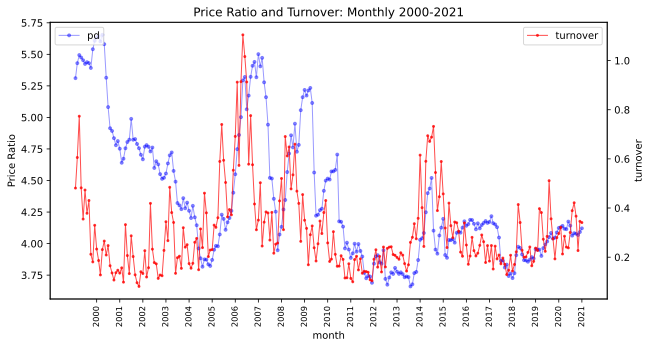

In [34]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(reg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Turnover: Monthly 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(reg_data['to'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='turnover')
ax2.set_ylabel('turnover')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='2000', end='2022', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('varying.pdf', bbox_inches='tight')

CPU times: total: 234 ms
Wall time: 233 ms


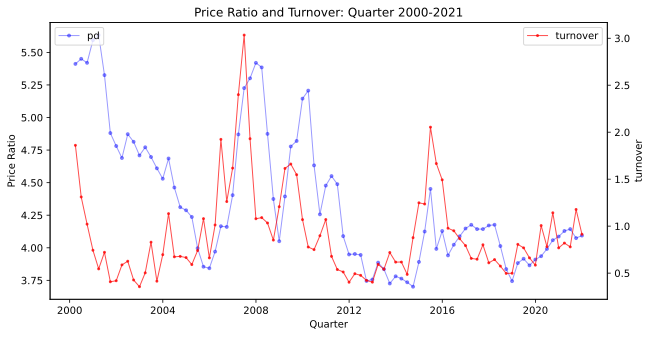

In [35]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(Qreg_data['pd'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='pd')
ax1.set_xlabel('Quarter')  # 设置横坐标标签
ax1.set_ylabel('Price Ratio')  # 设置左边纵坐标标签
ax1.legend(loc=2)  # 设置图例在左上方
ax1.set_title("Price Ratio and Turnover: Quarter 2000-2021")  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(Qreg_data['to'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='turnover')
ax2.set_ylabel('turnover')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

#year_freq = pd.date_range(start='2000', end='2022', freq='q')
#ticks = ax1.set_xticks(year_freq)
#labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('Qvarying.pdf', bbox_inches='tight')